In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv(r"C:\Users\jpedr\.cache\kagglehub\datasets\ihelon\coffee-sales\versions\21\index_1.csv")

In [26]:
df['datetime'] = pd.to_datetime(df['datetime'], format = 'mixed')
df['time'] = df['datetime'].dt.time
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
df['week'] = df['date'].dt.to_period('W')
df['cash_type'] = df['cash_type'].replace('card', 'cartao')
df['cash_type'] = df['cash_type'].replace('cash', 'dinheiro')

### Forma de Pagamento


In [38]:
cash_type = df.groupby('cash_type').agg({'money':['count', 'sum']}).reset_index()
cash_type.columns=['forma_pgto', 'num_vendas', 'faturamento']
cash_type

,forma_pgto,num_vendas,faturamento
0,cartao,3547,112245.58
1,dinheiro,89,3186.00


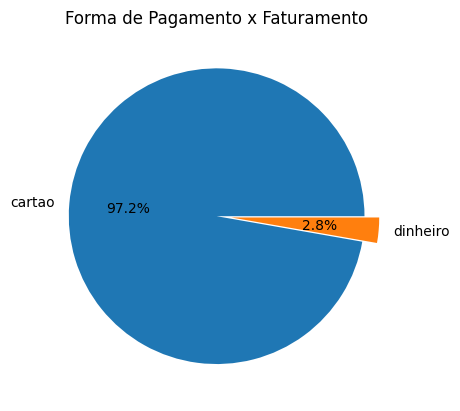

In [39]:
ax = plt.subplot()
ax.pie(cash_type['faturamento'], labels=cash_type['forma_pgto'], autopct='%1.1f%%', explode=(0,0.1))
plt.title('Forma de Pagamento x Faturamento')
plt.show()

<p>Podemos observar que a maioria dos pagamentos foram realizados no cartão</p>

### Nome do Café

In [29]:
nome_cafe = df.groupby('coffee_name').agg({'money':['sum', 'count']}).reset_index()
nome_cafe.columns = ['tipo', 'faturamento', 'num_vendas']
nome_cafe

,tipo,faturamento,num_vendas
0,Americano,15062.26,578
1,Americano with Milk,25269.12,824
2,Cappuccino,18034.14,501
3,Cocoa,8678.16,243
4,Cortado,7534.86,292
5,Espresso,2814.28,134
6,Hot Chocolate,10172.46,282
7,Latte,27866.30,782


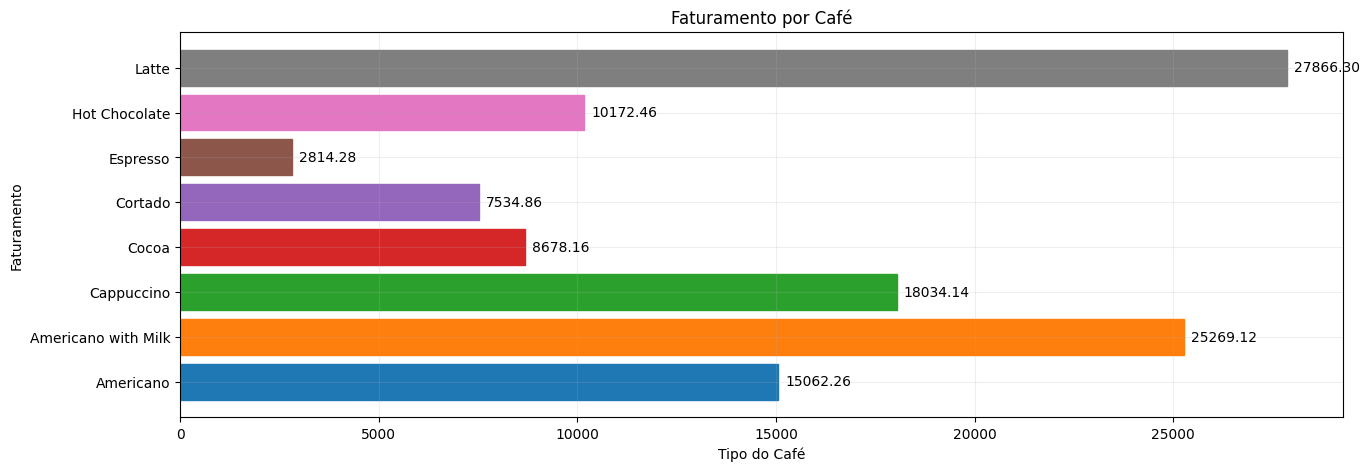

In [30]:
plt.figure(figsize=(15,5))
nome_cafe_plt = plt.barh(nome_cafe['tipo'], nome_cafe['faturamento'])

plt.grid(alpha = 0.2)
plt.title('Faturamento por Café')
plt.xlabel("Tipo do Café")
plt.ylabel("Faturamento")
plt.bar_label(nome_cafe_plt, fmt='%.2f', padding= 5)


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
categories = df['coffee_name'].unique()
for i, bar in enumerate(nome_cafe_plt.patches):
  bar.set_color(colors[i % len(colors)]) # Apply a color from the cycle

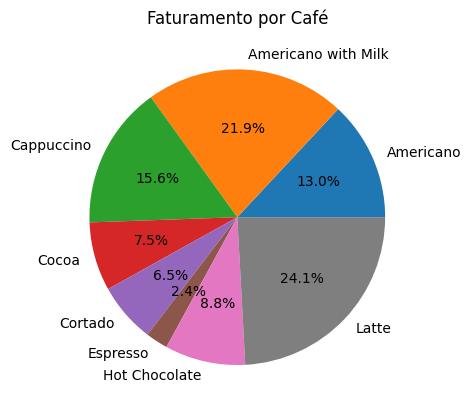

In [40]:
plt.pie(x = nome_cafe['faturamento'], labels= nome_cafe['tipo'], autopct='%1.1f%%')
plt.title('Faturamento por Café')
plt.show()


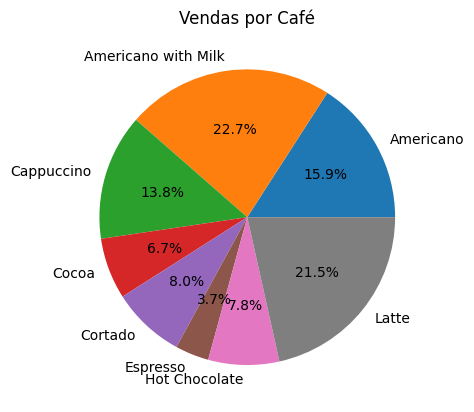

In [41]:
plt.pie(x = nome_cafe['num_vendas'], labels= nome_cafe['tipo'], autopct='%1.1f%%')
plt.title('Vendas por Café')
plt.show()


Líder de Faturamento: O Latte é o produto que mais gera receita, com R$ 27.866,30.

Líder de Volume: O Americano with Milk é o campeão de vendas em quantidade, com 824 unidades vendidas.

Menor Desempenho: O Espresso tem o menor volume (134) e o menor faturamento (R$ 2.814,28).

### Mês

In [33]:
# MESES
mes_vendas = df.groupby('month').agg({'money': ['count', 'sum']}).reset_index()
mes_vendas.columns = ['mes','num_vendas','faturamento']
mes_vendas['mes'] = mes_vendas['mes'].astype(str)
mes_vendas

,mes,num_vendas,faturamento
0,2024-03,206,7050.20
1,2024-04,196,6720.56
2,2024-05,267,9063.42
3,2024-06,227,7758.76
4,2024-07,237,6915.94
5,2024-08,272,7613.84
6,2024-09,344,9988.64
7,2024-10,426,13891.16
8,2024-11,259,8590.54
9,2024-12,259,8237.74


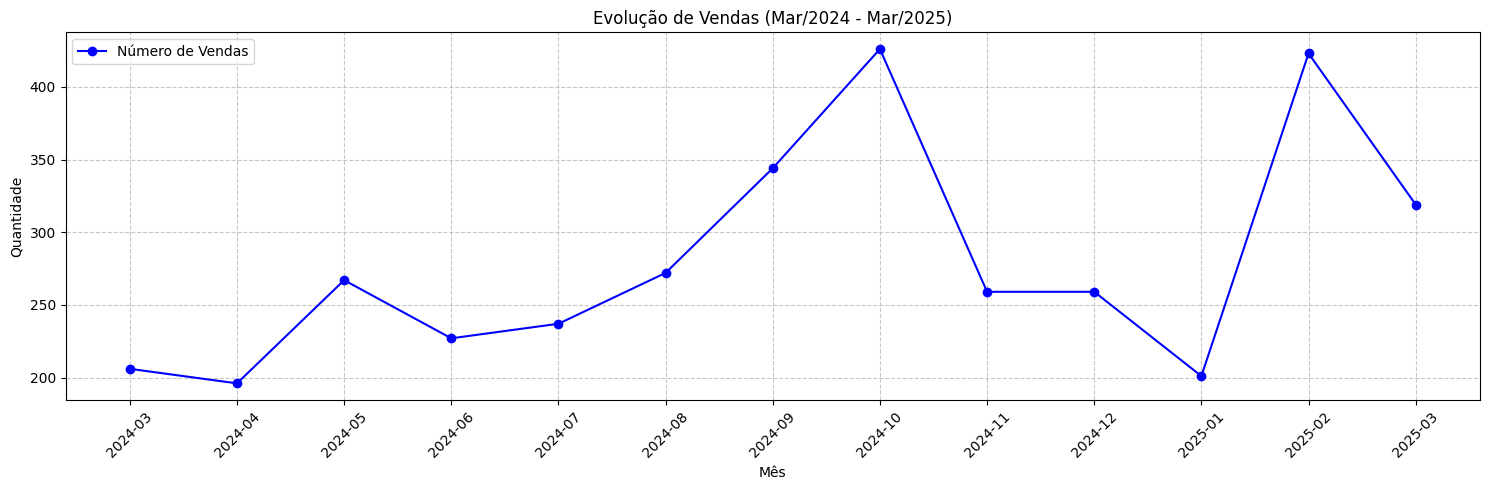

In [34]:
plt.figure(figsize=(15, 5)) # Define o tamanho da imagem
plt.plot(mes_vendas['mes'], mes_vendas['num_vendas'], marker='o', linestyle='-', color='b', label='Número de Vendas')

plt.title('Evolução de Vendas (Mar/2024 - Mar/2025)')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

<p>Crescimento Anual: Comparando março de 2024 com março de 2025, houve um crescimento de 54,8% no volume de vendas (de 206 para 319) e de 41,6% no faturamento.</p>
<p>Picos de Sazonalidade: O período de setembro a outubro de 2024 e o mês de fevereiro de 2025 apresentaram os maiores picos de atividade. O salto em fevereiro de 2025 (423 vendas) é particularmente notável após um janeiro lento (201 vendas).</p>
<p>Estabilidade de Preço: O faturamento acompanha de perto o número de vendas, indicando que o preço médio dos produtos ou serviços vendidos permaneceu relativamente constante ao longo do período.
</p>

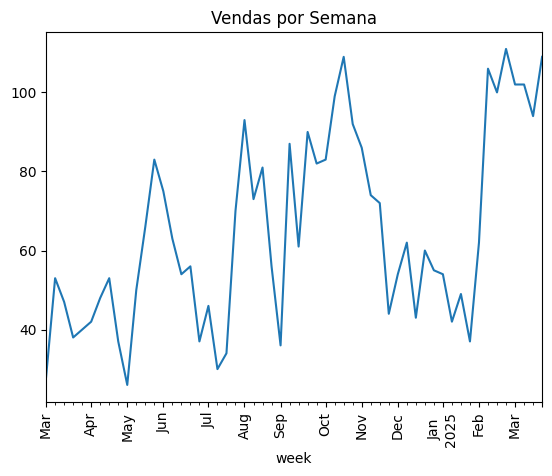

In [35]:
semana_vendas_df = df.groupby('week').agg({'money':['sum', 'count']}).reset_index()
semana_vendas_df

df.groupby('week')['money'].count().plot(kind='line', title='Vendas por Semana', rot= 90)
plt.show()

In [36]:
mes_cafe = df.groupby(['month', 'coffee_name']).agg(
  total_vendas = ('money', 'count'),
  faturamento = ('money', 'sum')
).reset_index()
mes_cafe['month'] = mes_cafe['month'].astype(str)

mes_cafe

,month,coffee_name,total_vendas,faturamento
0,2024-03,Americano,36,1044.80
1,2024-03,Americano with Milk,34,1154.00
2,2024-03,Cappuccino,20,780.50
3,2024-03,Cocoa,6,232.20
4,2024-03,Cortado,30,869.20
...,...,...,...,...
99,2025-03,Cocoa,30,1072.80
100,2025-03,Cortado,2,51.92
101,2025-03,Espresso,10,210.60
102,2025-03,Hot Chocolate,23,822.48


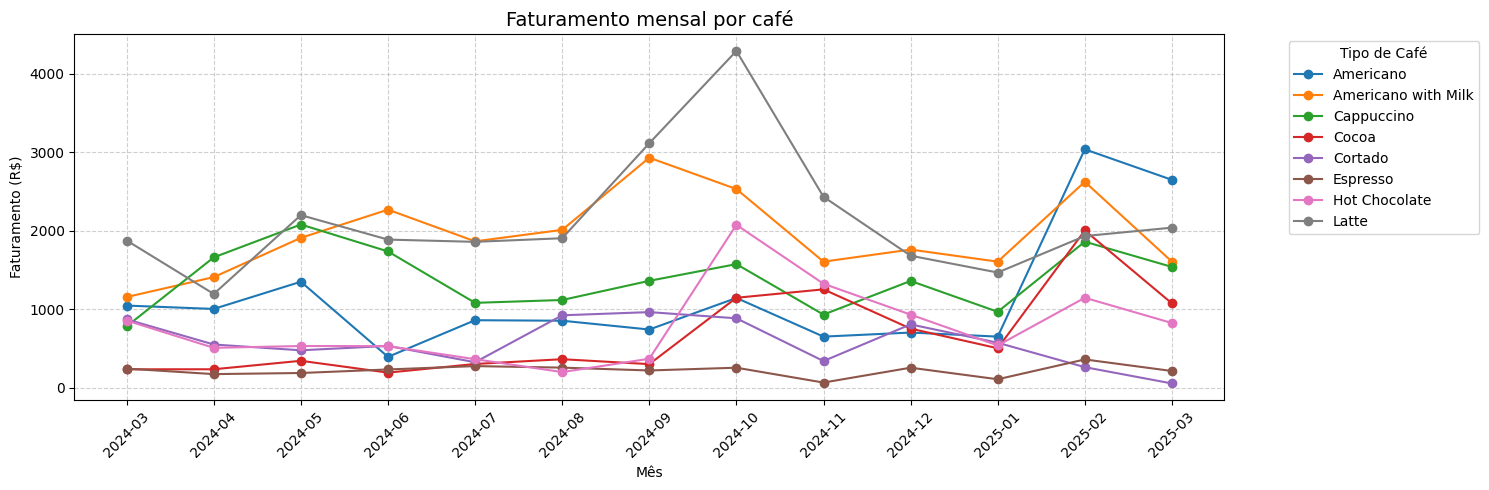

In [37]:
plt.figure(figsize=(15,5))

for cafe in mes_cafe['coffee_name'].unique():
  dados_cafe = mes_cafe[mes_cafe['coffee_name'] == cafe]

  plt.plot(dados_cafe['month'], dados_cafe['faturamento'], marker='o', label=cafe)

plt.title('Faturamento mensal por café', fontsize = 14)
plt.xlabel('Mês')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Café', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


Em Março de 2025, o Latte gerou **R$ 2.038,32**, o que representa cerca de 20% de todo o faturamento mensal (R$ 9.986,44).

Os produtos de "entrada" garantem o fluxo de caixa diário, mesmo que não tenham o maior ticket médio (o Americano puro tem um ticket de aprox. R$ 29,00, enquanto o Latte e Cappuccino operam na faixa de R$ 35,00+).